# 1. Import Module and Library

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from sklearn.datasets import load_iris
from sklearn.metrics.cluster import fowlkes_mallows_score
from sklearn.metrics.cluster import silhouette_score

from MyKMeans import MyKMeans
from MyAgglomerative import MyAgglomerative

# 2. Setup Dataset

In [30]:
dataset = load_iris()
data_x = dataset.data
data_y = dataset.target

In [31]:
print(data_x)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [32]:
print(data_y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# 3. Clustering Process

## 1. KMeans

In [33]:
kmeans_model = MyKMeans(3)
kmeans_model.fit(data_x)

In [34]:
kmeans_pred = kmeans_model.classes
kmeans_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int64)

### Evaluasi

In [35]:
kmeans_fms = fowlkes_mallows_score(data_y, kmeans_pred)
kmeans_scs = silhouette_score(data_x, kmeans_pred, 'euclidean')

print("Fowlkes-Mallows Score\t\t: ", kmeans_fms)
print("Silhouette-Coefficient Score\t: ", kmeans_scs)

Fowlkes-Mallows Score		:  0.8112427991975698
Silhouette-Coefficient Score	:  0.5511916046195916


## 2. Agglomerative

### 2.1 Single Linkage

In [36]:
agglomerative_model = MyAgglomerative(3, 'euclidean', 'single')
agglomerative_model.fit(data_x)

In [37]:
agglomerative_single_pred = agglomerative_model.lables_
agglomerative_single_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

### Evaluasi

In [38]:
agglo_fms = fowlkes_mallows_score(data_y, agglomerative_single_pred)
agglo_scs = silhouette_score(data_x, agglomerative_single_pred, 'euclidean')

print("Fowlkes-Mallows Score\t\t: ", agglo_fms)
print("Silhouette-Coefficient Score\t: ", agglo_scs)

Fowlkes-Mallows Score		:  0.7635170681000877
Silhouette-Coefficient Score	:  0.5121107753649304


### 2.2 Complete Linkage

In [39]:
agglomerative_model = MyAgglomerative(3, 'euclidean', 'complete')
agglomerative_model.fit(data_x)

In [40]:
agglomerative_complete_pred = agglomerative_model.lables_
agglomerative_complete_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

### Evaluasi

In [41]:
agglo_fms = fowlkes_mallows_score(data_y, agglomerative_complete_pred)
agglo_scs = silhouette_score(data_x, agglomerative_complete_pred, 'euclidean')

print("Fowlkes-Mallows Score\t\t: ", agglo_fms)
print("Silhouette-Coefficient Score\t: ", agglo_scs)

Fowlkes-Mallows Score		:  0.7686371028513819
Silhouette-Coefficient Score	:  0.5135953221192208


### 2.3 Average Linkage

In [42]:
agglomerative_model = MyAgglomerative(3, 'euclidean', 'average')
agglomerative_model.fit(data_x)

In [43]:
agglomerative_average_pred = agglomerative_model.lables_
agglomerative_average_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

### Evaluasi

In [44]:
agglo_fms = fowlkes_mallows_score(data_y, agglomerative_average_pred)
agglo_scs = silhouette_score(data_x, agglomerative_average_pred, 'euclidean')

print("Fowlkes-Mallows Score\t\t: ", agglo_fms)
print("Silhouette-Coefficient Score\t: ", agglo_scs)

Fowlkes-Mallows Score		:  0.8407289157574822
Silhouette-Coefficient Score	:  0.5541608580282847


### 2.4 Average Group Linkage (Centroid)

In [45]:
agglomerative_model = MyAgglomerative(3, 'euclidean', 'centroid')
agglomerative_model.fit(data_x)

In [46]:
agglomerative_average_group_pred = agglomerative_model.lables_
agglomerative_average_group_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

### Evaluasi

In [47]:
agglo_fms = fowlkes_mallows_score(data_y, agglomerative_average_group_pred)
agglo_scs = silhouette_score(data_x, agglomerative_average_group_pred, 'euclidean')

print("Fowlkes-Mallows Score\t\t: ", agglo_fms)
print("Silhouette-Coefficient Score\t: ", agglo_scs)

Fowlkes-Mallows Score		:  0.8407289157574822
Silhouette-Coefficient Score	:  0.5541608580282847


# 4. Visualisasi Clustering

### Plotting Data Latih

#### Tanpa Color-Coding Data Target Clustering

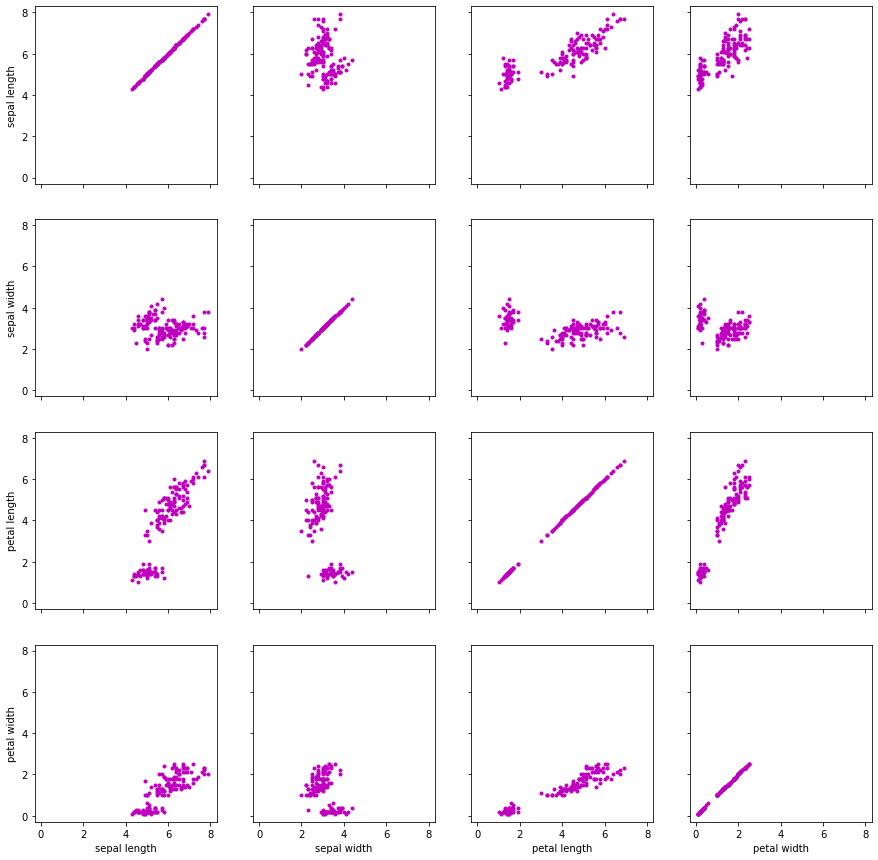

In [48]:
fig, axarr = plt.subplots(4, 4, sharex=True, sharey=True)     # 6 axes, returned as a 2-d array
fig.set_figheight(15)
fig.set_figwidth(15)

features = ['sepal length', 'sepal width', 'petal length', 'petal width']

for i in range(4):
    for j in range(4):
        plt.sca(axarr[i, j])                        # set the current axes instance 
        axarr[i, j].plot(data_x[:, j], data_x[:, i], marker='.', linestyle='', color='m') # plot 

# set labels
for i in range(4):
    for j in range(4):
        plt.setp(axarr[-1, i], xlabel=features[i])
        plt.setp(axarr[i, 0], ylabel=features[i])

plt.show()

#### Dengan Color-coding untuk Data Target Clustering
Merah untuk 0, hijau untuk 1, biru untuk 2

In [49]:
def color_by_pred(pred):
    if pred == 0:
        return 'r'
    elif pred == 1:
        return 'g'
    elif pred == 2:
        return 'b'
    else:
        return 'k'

In [50]:
def show_plot(prediction):
    fig, axarr = plt.subplots(4, 4, sharex=True, sharey=True)     # 6 axes, returned as a 2-d array
    fig.set_figheight(15)
    fig.set_figwidth(15)

    features = ['sepal length', 'sepal width', 'petal length', 'petal width']

    for i in range(4):
        for j in range(4):
            for k in range(len(data_y)):
                plt.sca(axarr[i, j])                        # set the current axes instance 
                axarr[i, j].plot(data_x[k, j], data_x[k, i], marker='.', linestyle='', color=color_by_pred(prediction[k])) # plot 

    # set labels
    for i in range(4):
        for j in range(4):
            plt.setp(axarr[-1, i], xlabel=features[i])
            plt.setp(axarr[i, 0], ylabel=features[i])

    plt.show()

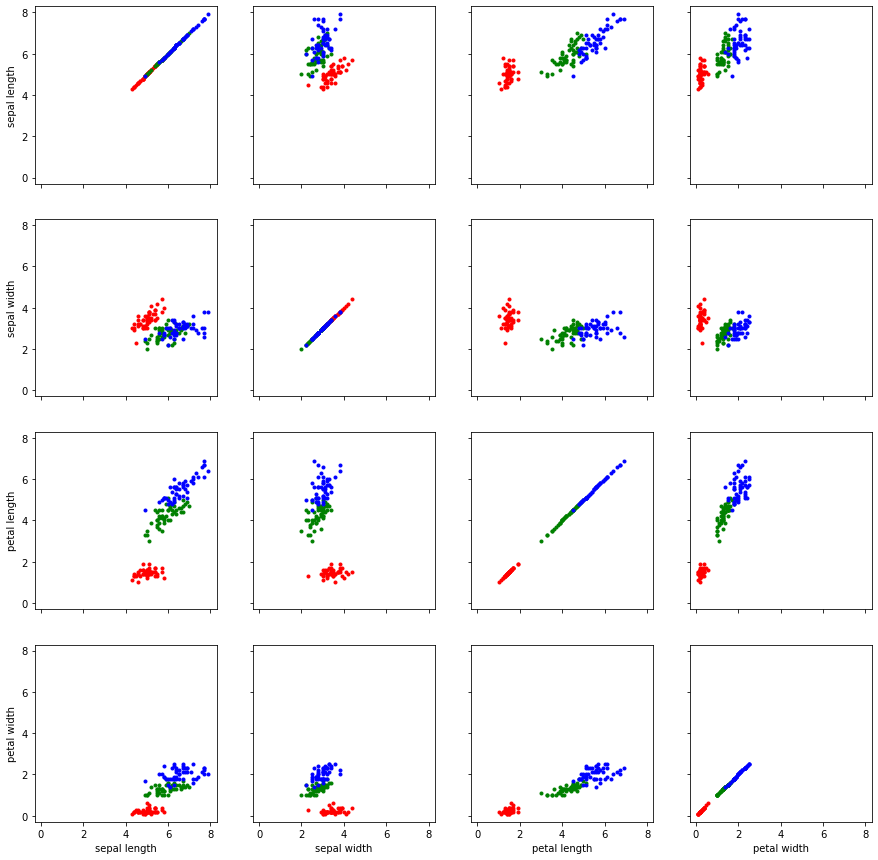

In [51]:
show_plot(data_y)

### Plotting Hasil Klasterisasi dengan Algoritma K-means

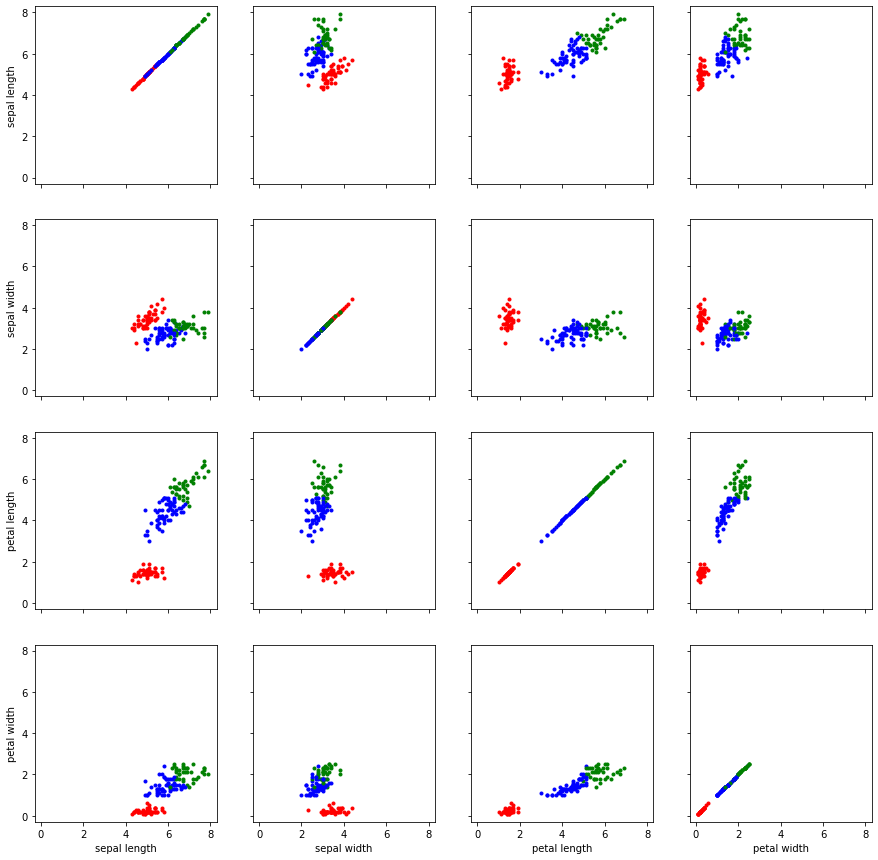

In [52]:
show_plot(kmeans_pred)

##### Analisis
Dari visualisasi dataset dengan hasil klasterisasi dengan algoritma k-means, dibandingkan dengan data target (data_y), hasil klasterisasi dengan k-means mendekati data target pada dataset latih. Hanya saja, terdapat perbedaan dari segi urutan pembentukan cluster yang diakibatkan oleh inisialisasi centroid secara random. Perbedaan urutan pembentukan cluster ini terlihat dari cluster berwarna hijau dan merah yang tampak "tertukar" posisinya. Pada array hasil prediksi, titik berwarna merah adalah titik dengan nilai pred = 0 dan titik berwarna hijau adalah titik dengan nilai pred = 1.

### Plotting Hasil Klasterisasi dengan Algoritma Agglomerative - Single Linkage

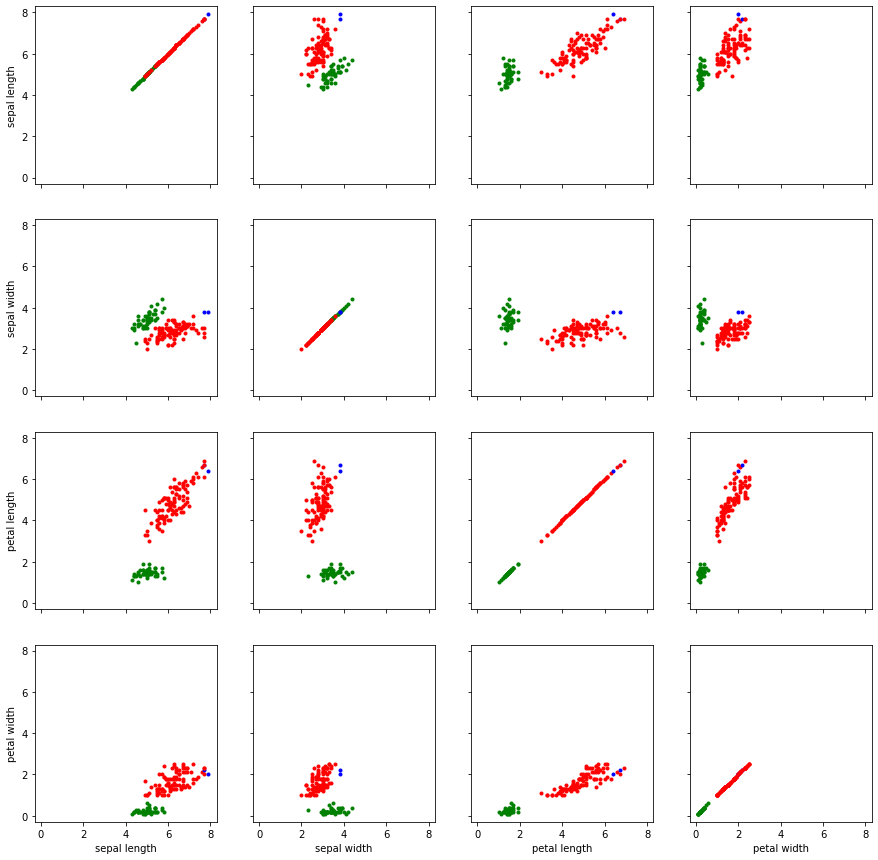

In [53]:
show_plot(agglomerative_single_pred)

#### Analisis
Dari visualisasi dataset dengan hasil klasterisasi dengan algoritma agglomerative - single linkage, dibandingkan dengan data target (data_y), hasil klasterisasi dengan agglomerative - single linkage relatif lebih berbeda dibandingkan dengan hasil klasterisasi dengan algoritma k-means. Hal ini terlihat dari kluster dengan titik-titik berwarna merah (pred = 0) yang sangat banyak dan titik-titik berwarna biru (pred = 2) yang sangat sedikit. Kluster dengan titik berwarna hijau relatif tidak mengalami perubahan jumlah yang signifikan dibandingkan dengan hasil algoritma k-means.

### Plotting Hasil Klasterisasi dengan Algoritma Agglomerative - Complete Linkage

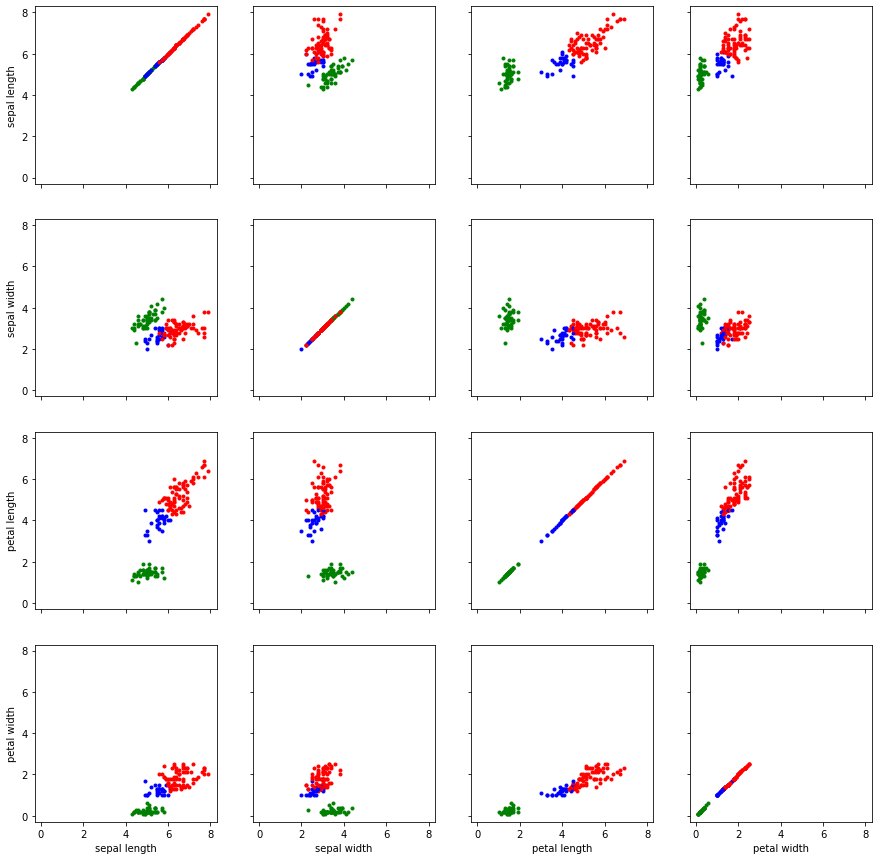

In [54]:
show_plot(agglomerative_complete_pred)

#### Analisis
Dari visualisasi dataset dengan hasil klasterisasi dengan algoritma agglomerative - complete linkage, dibandingkan dengan data target (data_y), hasil klasterisasi dengan agglomerative - complete linkage memiliki perbedaan yang terletak pada lebih banyaknya titik berwarna biru dibandingkan titik berwarna hijau pada data target (yang menunjukkan group atau klaster yang analog). Hasil klasterisasi dengan agglomerative - complete linkage juga berbeda dengan agglomerative - single linkage, di mana jumlah anggota klaster-klaster pada complete linkage tidak setimpang pada single linkage.

### Plotting Hasil Klasterisasi dengan Algoritma Agglomerative - Average Linkage

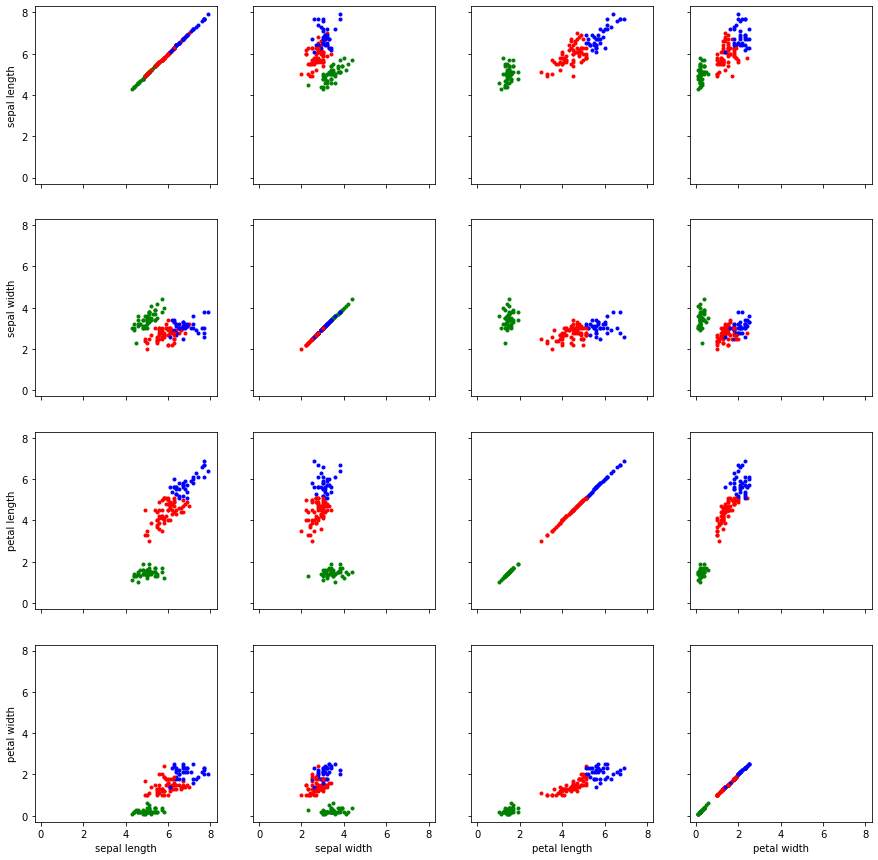

In [55]:
show_plot(agglomerative_average_pred)

#### Analisis
Dari visualisasi dataset dengan hasil klasterisasi dengan algoritma agglomerative - average linkage, dibandingkan dengan data target (data_y), hasil klasterisasi dengan agglomerative - average linkage memiliki perbedaan yang terletak pada lebih banyaknya titik berwarna merah dibandingkan titik berwarna hijau pada data target (yang menunjukkan group atau klaster yang analog). Hasil klasterisasi dengan agglomerative - average linkage juga berbeda dengan agglomerative - single linkage, di mana jumlah anggota klaster-klaster pada average linkage tidak setimpang pada single linkage. Walaupun begitu, hasil klasterisasi pada average linkage memiliki titik biru yang lebih sedikit dibandingkan titik merah (klaster yang analog) pada complete linkage.

### Plotting Hasil Klasterisasi dengan Algoritma Agglomerative - Average Group Linkage

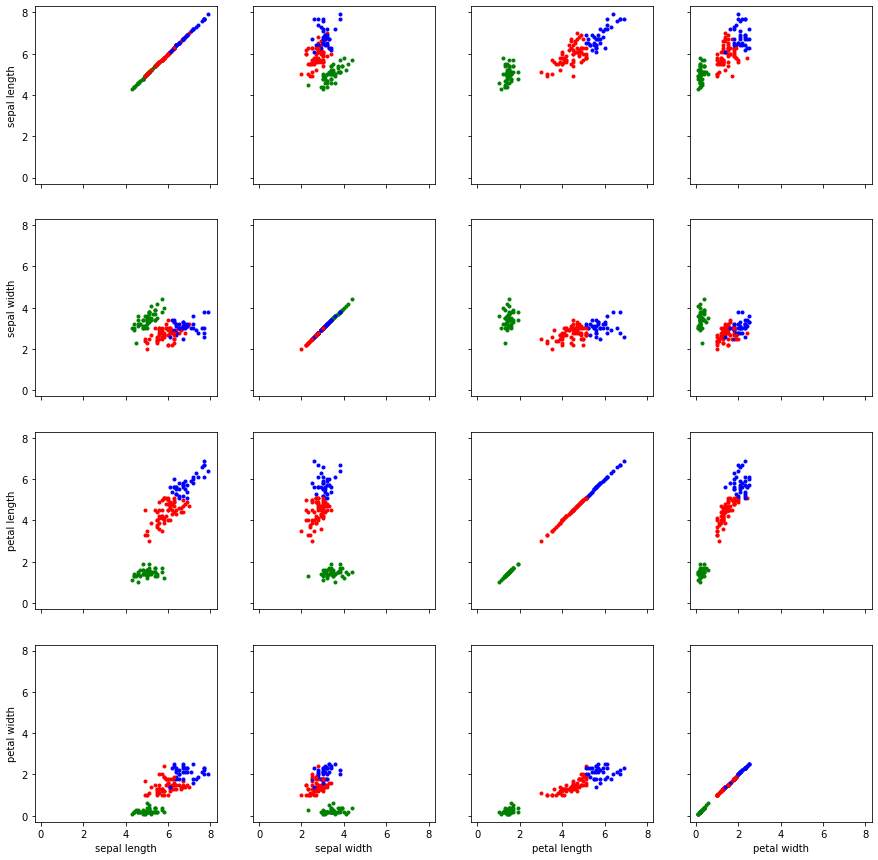

In [56]:
show_plot(agglomerative_average_group_pred)

#### Analisis
Terlihat bahwa klaster-klaster yang dihasilkan algoritma agglomerative - average group linkage identik dengan klaster-klaster pada algoritma agglomerative - group linkage. Penyebabnya adalah ukuran dataset yang kecil sehingga penentuan jarak antar cluster dengan menghitung rata-rata dari setiap kemungkinan jarak data antar cluster (pada average linkage) hasilnya sangat mendekati penentuan jarak dengan menghitung rerata dari masing-masing cluster (centroid) terlebih dahulu.